#### PREPARE
modules import, clean data import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [3]:
df = pd.read_csv('../boston_clean.csv')

##### CHANGING TYPE OF COLUMNS THAT USING TIME AS VALUES

In [5]:
time_columns = ['Pace', '5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K', 'Official Time']
df[time_columns] = df[time_columns].apply(lambda col: pd.to_timedelta(col, errors='coerce'))

# BIVARIATE

## Gender x Official time

In [8]:
df_gender_time = df.copy()[['M/F', 'Official Time']]

In [9]:
df_gender_officialtime = df_gender_time.groupby(by='M/F')['Official Time'].agg(
    min_time='min',
    max_time='max',
    mean_time='mean',
    median_time='median')
df_gender_officialtime

,min_time,max_time,mean_time,median_time
M/F,,,,
F,0 days 02:21:52,0 days 10:30:23,0 days 04:04:27.026385662,0 days 03:55:38
M,0 days 02:09:17,0 days 08:25:09,0 days 03:43:46.911664596,0 days 03:35:17


### visualization

In [11]:
df_gender_time['Official Time'] = df_gender_time['Official Time'].dt.total_seconds() / 3600

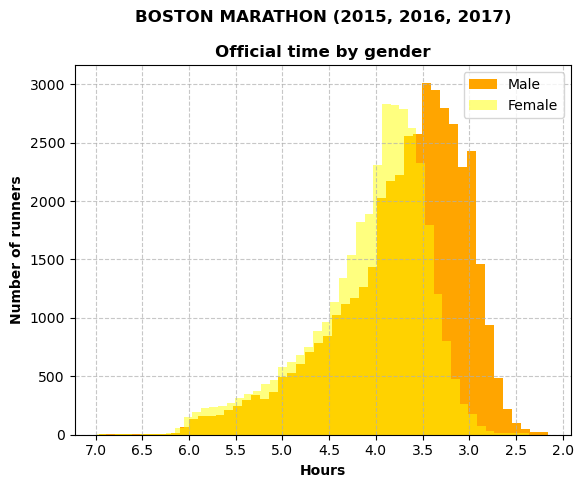

In [12]:
threshold = 7
df_gender_time = df_gender_time[df_gender_time['Official Time'] < threshold]

x_m = df_gender_time[df_gender_time['M/F'] == 'M']
x_fm = df_gender_time[df_gender_time['M/F'] == 'F']

# plt.figure(figsize=(10,5))

hist_m = plt.hist(x_m['Official Time'], bins=50, color='orange', alpha=1, label='Male')
hist_fm = plt.hist(x_fm['Official Time'], bins=50, color='yellow', alpha=0.5, label='Female')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().invert_xaxis()
plt.xticks(np.arange(7,1.5,-0.5))

plt.xlabel('Hours', fontweight='bold')
plt.ylabel('Number of runners', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nOfficial time by gender', fontweight='bold')

plt.savefig("../vexport/genderxofficial_time.png", dpi=300, bbox_inches='tight')
plt.show()

#### export

In [14]:
df_gender_officialtime.to_csv('../export/mfxofficialtime.csv')